In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Topic_5_Regression/Task/customers.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,0,3,3,742.57,1,1,1,9675.93,2,urban,560.481447
1,1,1,5,952.99,0,1,0,35064.79,1,rural,633.283679
2,2,3,1,761.44,1,1,1,22292.44,0,urban,511.879157
3,3,0,5,861.32,1,1,0,12139.08,0,urban,332.992035
4,4,1,8,731.61,0,1,0,17230.10,2,rural,658.285625
...,...,...,...,...,...,...,...,...,...,...,...
995,995,3,0,991.31,0,1,0,12687.26,1,rural,655.870111
996,996,2,5,847.97,0,1,0,39502.92,0,urban,354.472693
997,997,2,4,660.94,1,0,0,10145.17,0,rural,568.660550
998,998,1,1,814.75,0,1,1,15535.05,0,rural,653.423314


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   num_rooms           1000 non-null   int64  
 2   num_people          1000 non-null   int64  
 3   housearea           1000 non-null   float64
 4   is_ac               1000 non-null   int64  
 5   is_tv               1000 non-null   int64  
 6   is_flat             1000 non-null   int64  
 7   ave_monthly_income  1000 non-null   float64
 8   num_children        1000 non-null   int64  
 9   is_urban            1000 non-null   object 
 10  amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7), object(1)
memory usage: 86.1+ KB


In [4]:
#Загальний огляд показав що пропущених значень в нашому датасеті немає, є дані типу int64, float64 та object, тобто лише одна змінна категоріальна

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True) #Видаляємо стовпчик "Unnamed: 0" тому що він нам не потрібен

In [7]:
df.columns

Index(['num_rooms', 'num_people', 'housearea', 'is_ac', 'is_tv', 'is_flat',
       'ave_monthly_income', 'num_children', 'is_urban', 'amount_paid'],
      dtype='object')

In [ ]:
#а) Проаналізуйте розподіл основних кількісних змінних (наприклад, кількість кімнат, площа житла, середній місячний дохід, сума рахунку за електроенергію). Прокоментуйте отримані результати та зробіть висновок, чи є підозрілі аномально великі значення порівняно із типовими значеннями.

In [8]:
df[['num_rooms', 'housearea', 'ave_monthly_income', 'amount_paid']].describe()

,num_rooms,housearea,ave_monthly_income,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.962000,794.703420,24684.986550,600.396359
std,1.030348,147.771736,9678.228224,181.406210
min,-1.000000,244.400000,-1576.440000,87.851850
25%,1.000000,691.037500,18036.762500,475.065141
50%,2.000000,789.970000,24742.575000,598.331726
75%,3.000000,892.955000,31402.357500,729.930489
max,5.000000,1189.120000,56531.080000,1102.994109


In [9]:
#Проаналізувавши змінні кількість кімнат, площа житла, середній місячний дохід, сума рахунку за електроенергію ми бачимо, що мінімальне значення кількості кімнат дорівнює -1 що є підозрілим значенням, -1 кімнати в будинку бути не може. Також мінімаьне значення місячного доходу дорівнює -1576.44 що також могло бути підозрілим значенням, але такий варіант можливий, наприклад, коли домогосподарство лише витрачало кошти.
#Всі інші дані в принципі нормальні, бачимо що максимальна кількість кімнат в будинку у нас 5, більшість домогосподарств це 2-кімнатні будинки/квартири, мінімальна площа будинку складає 244.4, максимальна-1189.12, в середньому-794.703420, мінімальне значення середнього місячного доходу -1576.44, максимаьне-56531.08, мінімальна сума рахунку-87.851850, максимальна-1102.994109

In [10]:
df[df['num_rooms'] < 0] #Переглядаємо помешкання де кількість кімна менше 0

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
90,-1,5,697.17,0,1,1,17804.39,2,rural,817.514877
121,-1,2,638.39,0,1,0,26305.76,2,rural,675.483254
181,-1,8,801.48,1,1,0,22003.44,2,rural,960.313086
482,-1,5,806.50,1,1,0,10799.59,0,urban,450.252797
632,-1,8,696.99,0,1,1,13396.89,0,urban,322.381773


In [11]:
df[df['num_rooms'] == -1].index #Отримуємо індекси рядків які відповідають нашій умові

Index([90, 121, 181, 482, 632], dtype='int64')

In [12]:
df.drop(df[df['num_rooms'] == -1].index, inplace=True) #Видаляжмо всі рядки де кількість кімнат -1, тому що такі значенн не омжливі

In [13]:
df[['num_rooms', 'housearea', 'ave_monthly_income', 'amount_paid']].describe()

,num_rooms,housearea,ave_monthly_income,amount_paid
count,995.000000,995.000000,995.000000,995.000000
mean,1.976884,795.038080,24718.267819,600.171270
std,1.011239,147.994162,9682.897127,181.079650
min,0.000000,244.400000,-1576.440000,87.851850
25%,1.000000,690.975000,18069.955000,475.252522
50%,2.000000,790.510000,24762.940000,598.141450
75%,3.000000,893.305000,31419.565000,729.703138
max,5.000000,1189.120000,56531.080000,1102.994109


In [14]:
#Перевірили інформацію, і тепер бачимо що наші дані адекватні
#Отже, ми проаналізували розподіл основних кількісних змінних, видалили рядки де мінімальне значення кімнат було -1, середній місячний дохід я залишла без змін, тому що в теорії це може бути від'ємне число, наприклад, коли домогосподарство лише витрачало кошти, без надходжень

In [15]:
#б) порівняйте суми рахунків за електроенергію між різними групами абонентів:міські vs сільські домогосподарства;квартири vs приватні будинки.Зробіть короткий висновок: хто в середньому платить більше. в) оцініть розподіл категоріальних змінних:скільки абонентів мешкає у місті / у селі;скільки абонентів живе у квартирі / у приватному будинку.
#Коротко опишіть структуру вибірки: більшість абонентів — міські чи сільські? більше квартир чи будинків?

In [16]:
df.groupby('is_urban')['amount_paid'].mean() #Порівнюємо суми рахунків за електроенергію між різними групами абонентів які живуть у сільській місцевості та міській. Виводимо середнє значення рахунку

is_urban
rural    694.35685
urban    454.06287
Name: amount_paid, dtype: float64

In [17]:
#Бачимо що є суттєві відмінності. Люди які проживають в сільській місцевості в середньому платять 694.35685 грошових одиниць, як в місті-454.06287. Тобто можемо зробити висновок що середній рахунок суттєво залежить від локації

In [18]:
df.groupby('is_flat')['amount_paid'].mean() #Порівнюєм чи залежить рахунок від типу помешкання

is_flat
0    574.086064
1    628.727706
Name: amount_paid, dtype: float64

In [19]:
#Тут також бачимо що люди які мешкають в квартирі мають середнє значення рахунку 628.727706 гр.од, які в приватному буднку-574.086064. Тобто тип поешкання також досить суттєво впливає на рахунок за електроенергію

In [20]:
#Короткий висновок: більше платять люди які проживають в сільській місцевості та мають квартиру, менше платять люди які проживать в місті та мають приватний будинок

In [21]:
#в) оцініть розподіл категоріальних змінних: скільки абонентів мешкає у місті / у селі; скільки абонентів живе у квартирі / у приватному будинку.
#Коротко опишіть структуру вибірки: більшість абонентів — міські чи сільські? більше квартир чи будинків?

In [22]:
df[['is_urban']].value_counts()

is_urban
rural       605
urban       390
Name: count, dtype: int64

In [23]:
#В даному наборі даних більшість помешкань розташовані в сільській місцевосці (605 помешкань), менше в міській (390)

In [24]:
df[['is_urban']].value_counts(normalize=True) #Розрахунок у відсотках

is_urban
rural       0.60804
urban       0.39196
Name: proportion, dtype: float64

In [25]:
df[['is_flat']].value_counts()

is_flat
0          520
1          475
Name: count, dtype: int64

In [26]:
#В даному наборі даних більшість помешкань є приватними будинками (520), менше квартири (475)

In [27]:
df[['is_flat']].value_counts(normalize=True)  #Розрахунок у відсотках

is_flat
0          0.522613
1          0.477387
Name: proportion, dtype: float64

In [28]:
#Реалізуйте алгоритми дерева рішень та випадкового лісу, за показниками R2 та MSE оберіть найкращий алгоритм. Для найкращого алгоритму визначте фактори, які мають найбільший вплив на рахунок за електроенергію. Отримані результати прокоментуйте.

In [29]:
# Незалежні змінні - всі в датафреймі df, крім amount_paid
X = df.drop(['amount_paid'], axis=1)

# price - цільова (прогнозована) змінна
y = df['amount_paid']

In [30]:
from sklearn.preprocessing import OneHotEncoder

# Вибираємо категоріальні стовпці
categorical_columns = X.select_dtypes(include=['object']).columns

# Ініціалізуємо OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Застосовуємо OneHotEncoder до категоріальних стовпців
encoded_columns = encoder.fit_transform(X[categorical_columns])

# Створюємо новий DataFrame з перекодованими змінними і назвами колонок
encoded_X = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Переконаємося, що індекси X і encoded_X співпадають
encoded_X.index = X.index

# Видаляємо оригінальні категоріальні стовпці
X = X.drop(columns=categorical_columns)

# Об'єднуємо початковий DataFrame з новими перекодованими стовпцями
X = pd.concat([X, encoded_X], axis=1)

# Перевіряємо результати
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           995 non-null    int64  
 1   num_people          995 non-null    int64  
 2   housearea           995 non-null    float64
 3   is_ac               995 non-null    int64  
 4   is_tv               995 non-null    int64  
 5   is_flat             995 non-null    int64  
 6   ave_monthly_income  995 non-null    float64
 7   num_children        995 non-null    int64  
 8   is_urban_urban      995 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 77.7 KB
None


In [31]:
# Розбиваємо дані на навчальну і тестову вибірки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [32]:
# імпортуємо необхідні для навчання та тестування моделі класи з бібліотеки sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Навчання моделей
tree_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred_tree = tree_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Оцінювання якості
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Виведення результатів
print('Decision Tree Regressor:')
print(f'R² = {r2_tree:.3f}')
print(f'RMSE = {rmse_tree:.2f}\n')

print('Random Forest Regressor:')
print(f'R² = {r2_rf:.3f}')
print(f'RMSE = {rmse_rf:.2f}')

Decision Tree Regressor:
R² = 0.831
RMSE = 85.75

Random Forest Regressor:
R² = 0.881
RMSE = 71.85


In [33]:
#Висновок: модель дерева рішень на 83.1% може пояснити розмір рахунку за електроенергію, модель випадкового лісу показує кращу точність, а саме 88.1%. Показник RMSE показує на скільки реальні значення цільової змінної можуть відхилятися від тих значень які прогнозує модель, тобто прогноз за моделлю дерева рішень може відхилятись на 85.75 гр.од, модель випадкового лісу на 71.85 гр.од. Для подальшої роботи нам більше підходить модель випадкового лісу

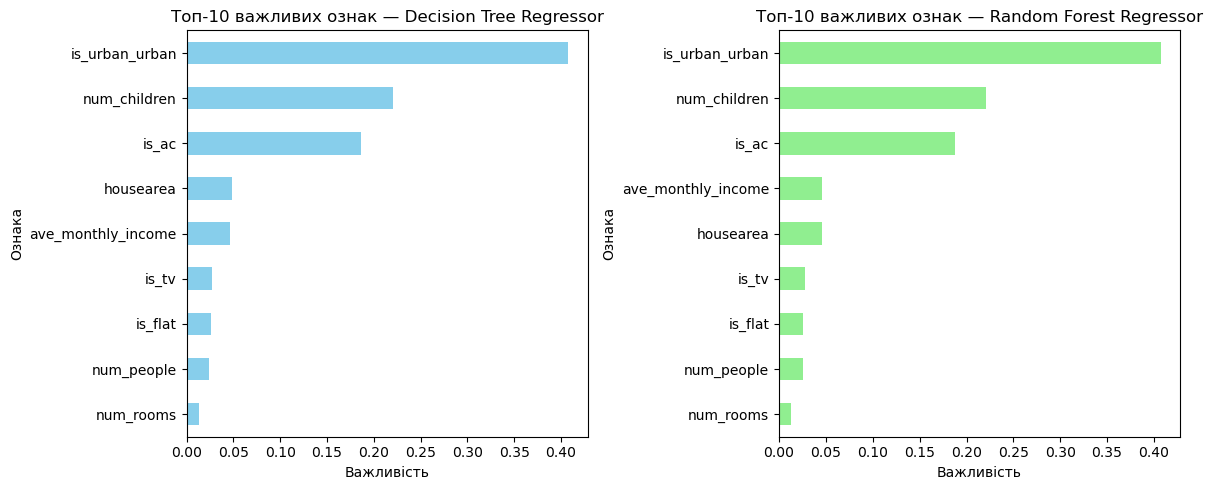

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Отримуємо важливість ознак ---
tree_importance = pd.Series(tree_model.feature_importances_, index=X_train.columns)
rf_importance   = pd.Series(rf_model.feature_importances_,   index=X_train.columns)

# Вибираємо топ-10 і сортуємо для красивого barh (знизу вгору)
top10_tree = tree_importance.nlargest(10).sort_values()
top10_rf   = rf_importance.nlargest(10).sort_values()

# --- 2. Будуємо графіки ---
plt.figure(figsize=(12, 5))

# Графік 1 — Decision Tree (топ-10)
plt.subplot(1, 2, 1)
top10_tree.plot(kind='barh', color='skyblue')
plt.title("Топ-10 важливих ознак — Decision Tree Regressor")
plt.xlabel("Важливість")
plt.ylabel("Ознака")

# Графік 2 — Random Forest (топ-10)
plt.subplot(1, 2, 2)
top10_rf.plot(kind='barh', color='lightgreen')
plt.title("Топ-10 важливих ознак — Random Forest Regressor")
plt.xlabel("Важливість")
plt.ylabel("Ознака")

plt.tight_layout()
plt.show()

In [35]:
#Аналіз отриманих результатів: в обох моделях майже всі фактори співпадають проте в моделі дерева рішень середній місячний дохід має меншу пріорітетність ніж площа помешкання, а в моделі випадкового лісу навпаки. Найважливішим фактором є локація помешкання, на другому та третьому місці є кількість дітей та наявність кондеціонера відповідно. Найменший вплив на вартість рахунку має кількість кімнат в помешканні

In [36]:
#В файлі "new_customers.csv" міститься інформація про 15 нових абонентів. Необхідно спрогнозувати розмір рахунків за електроенергію для нових абонентів (метод .predict()).

In [40]:
url = 'https://raw.githubusercontent.com/OlhaOsypova/Machine-Learning-and-Data-Analytics/refs/heads/main/Topic_5_Regression/Task/new_customers.csv'
dfnew = pd.read_csv(url)
dfnew

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban
0,2,4,976.34,0,0,0,3507.86,1,rural
1,1,6,694.81,0,1,1,31686.00,2,urban
2,3,3,835.89,1,1,1,14067.73,2,urban
3,0,3,698.83,0,0,0,13817.63,0,urban
4,2,6,931.66,1,0,1,22386.93,1,urban
5,3,1,851.93,0,0,0,16419.26,1,rural
6,2,2,767.13,1,1,1,25828.96,1,urban
7,3,7,627.30,0,1,0,32568.90,0,rural
8,3,0,1060.11,0,1,1,33817.84,1,rural
9,2,8,969.13,1,1,0,10539.88,1,urban


In [55]:
dfnew.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_rooms              15 non-null     int64  
 1   num_people             15 non-null     int64  
 2   housearea              15 non-null     float64
 3   is_ac                  15 non-null     int64  
 4   is_tv                  15 non-null     int64  
 5   is_flat                15 non-null     int64  
 6   ave_monthly_income     15 non-null     float64
 7   num_children           15 non-null     int64  
 8   is_urban_urban         15 non-null     int64  
 9   predicted_amount_paid  15 non-null     float64
dtypes: float64(3), int64(7)
memory usage: 1.3 KB


In [ ]:
#Перевірили інформацію про новий датасет, змінна predicted_amount_paid має тип даних object тому її потрібно буде перекодувати (тут я перевіряла код і ця змінна вже перекодована але до цього вона мала тип даних object)

In [46]:
from sklearn.preprocessing import OneHotEncoder

# Вибираємо категоріальні стовпці
categorical_columns = X.select_dtypes(include=['object']).columns

# Ініціалізуємо OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Застосовуємо OneHotEncoder до категоріальних стовпців
encoded_columns = encoder.fit_transform(X[categorical_columns])

# Створюємо новий DataFrame з перекодованими змінними і назвами колонок
encoded_X = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Переконаємося, що індекси X і encoded_X співпадають
encoded_X.index = X.index

# Видаляємо оригінальні категоріальні стовпці
X = X.drop(columns=categorical_columns)

# Об'єднуємо початковий DataFrame з новими перекодованими стовпцями
X = pd.concat([X, encoded_X], axis=1)

# Перевіряємо результати
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           995 non-null    int64  
 1   num_people          995 non-null    int64  
 2   housearea           995 non-null    float64
 3   is_ac               995 non-null    int64  
 4   is_tv               995 non-null    int64  
 5   is_flat             995 non-null    int64  
 6   ave_monthly_income  995 non-null    float64
 7   num_children        995 non-null    int64  
 8   is_urban_urban      995 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 77.7 KB
None


In [54]:
#Перевіряємо чи стовпці збігаються з X_train 
dfnew = dfnew.reindex(columns=X_train.columns, fill_value=0)

#Обираємо найкращу модель (Random Fores)
best_model = rf_model  

#робимо прогноз
predictions = best_model.predict(dfnew)

#Додаємо прогноз до таблиці
dfnew['predicted_amount_paid'] = predictions

#Дивимось на результат
dfnew

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban_urban,predicted_amount_paid
0,2,4,976.34,0,0,0,3507.86,1,0,529.194612
1,1,6,694.81,0,1,1,31686.00,2,0,808.284915
2,3,3,835.89,1,1,1,14067.73,2,0,918.895733
3,0,3,698.83,0,0,0,13817.63,0,0,473.011383
4,2,6,931.66,1,0,1,22386.93,1,0,747.617704
5,3,1,851.93,0,0,0,16419.26,1,0,545.258353
6,2,2,767.13,1,1,1,25828.96,1,0,819.616207
7,3,7,627.30,0,1,0,32568.90,0,0,523.816385
8,3,0,1060.11,0,1,1,33817.84,1,0,671.672256
9,2,8,969.13,1,1,0,10539.88,1,0,830.583891


In [ ]:
#Ми спрогнозували розмір рахунків за електроенергію для нових абонентів. Вони виведені в колонці predicted_amount_paid